<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
# The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook.
import keras
import numpy as np
from keras.datasets import boston_housing

(X_train, y_train),(X_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

input_shape = 13

X_train shape: (404, 13)
y_train shape: (404,)
X_test shape: (102, 13)
y_test shape: (102,)


In [3]:
# Do a little bit of feature engineering and see how that affects your 
# neural network model. (you will need to change your model to accept 
# more inputs)

# Feature engineering by introducing few interaction variables
f1 = X_train[:,0]*X_train[:,2]
f2 = X_train[:,4]*X_train[:,6]
f3 = X_train[:,8]*X_train[:,10]
f4 = X_train[:,1]*X_train[:,3]
f5 = X_train[:,1]*X_train[:,3]
f6 = X_train[:,5]*X_train[:,7]
f7 = X_train[:,9]*X_train[:,11]
f8 = X_train[:,12]**2

X_train = np.column_stack((X_train, f1, f2, f3, f4, f5, f6, f7, f8))

f1 = X_test[:,0]*X_test[:,2]
f2 = X_test[:,4]*X_test[:,6]
f3 = X_test[:,8]*X_test[:,10]
f4 = X_test[:,1]*X_test[:,3]
f5 = X_test[:,1]*X_test[:,3]
f6 = X_test[:,5]*X_test[:,7]
f7 = X_test[:,9]*X_test[:,11]
f8 = X_test[:,12]**2

X_test = np.column_stack((X_test, f1, f2, f3, f4, f5, f6, f7, f8))

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

input_shape = 21

X_train shape: (404, 21)
y_train shape: (404,)
X_test shape: (102, 21)
y_test shape: (102,)


In [0]:
# Normalize the data (all features should have roughly the same scale)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std

# Normalize the test data using the same training quantities
X_test -= mean
X_test /= std

In [0]:
# Import the type of model and layers that you will need from Keras.
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
# Instantiate a model object and use model.add() to add layers to your model
# Since this is a regression model you will have a single output node in the final layer.
# Use activation functions that are appropriate for this task
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(input_shape,)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
# Compile your model
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [9]:
# Fit your model and report its accuracy in terms of Mean Squared Error
fit = model.fit(X_train, y_train, epochs=200, validation_split=0.1)
scores = model.evaluate(X_test, y_test)

Instructions for updating:
Use tf.cast instead.
Train on 363 samples, validate on 41 samples
Epoch 1/200
363/363 [==============================] - 0s 560us/step - loss: 581.4643 - mean_squared_error: 581.4643 - val_loss: 476.3349 - val_mean_squared_error: 476.3349
Epoch 2/200
363/363 [==============================] - 0s 58us/step - loss: 554.7662 - mean_squared_error: 554.7662 - val_loss: 457.5874 - val_mean_squared_error: 457.5874
Epoch 3/200
363/363 [==============================] - 0s 59us/step - loss: 538.5820 - mean_squared_error: 538.5820 - val_loss: 442.8529 - val_mean_squared_error: 442.8529
Epoch 4/200
363/363 [==============================] - 0s 55us/step - loss: 523.9611 - mean_squared_error: 523.9611 - val_loss: 430.6845 - val_mean_squared_error: 430.6845
Epoch 5/200
363/363 [==============================] - 0s 58us/step - loss: 513.3131 - mean_squared_error: 513.3131 - val_loss: 420.6884 - val_mean_squared_error: 420.6884
Epoch 6/200
363/363 [=========================

In [10]:
print(f"{model.metrics_names[1]}: {scores[1]}")
mse = scores[1]
print(f'Root Mean Square Error from NN is {np.sqrt(mse)}')

mean_squared_error: 50.008289262360215
Root Mean Square Error from NN is 7.071653926936769


**Without Feature Engineering:**

mean_squared_error: 17.787841497683058

Root Mean Square Error from NN is 4.217563455086723

**With Feature Engineering:**

mean_squared_error: 17.462280871821385

Root Mean Square Error from NN is 4.17878940266453

**With Dropout:**

mean_squared_error: 21.483923519358914

Root Mean Square Error from NN is 4.635075352069146

**Using sigmoid instead of ReLU:**

mean_squared_error: 63.61017174814262

Root Mean Square Error from NN is 7.975598519743996

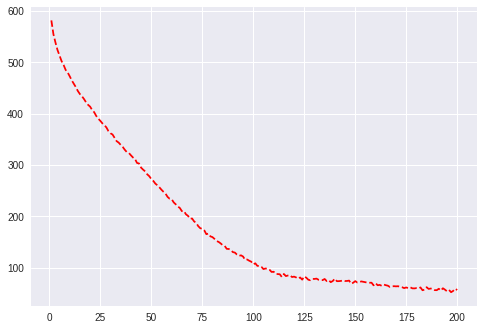

In [11]:
# Use the history object that is returned from model.fit to make graphs of 
# the model's loss or train/validation accuracies by epoch.
import matplotlib.pyplot as plt
training_loss = fit.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show();

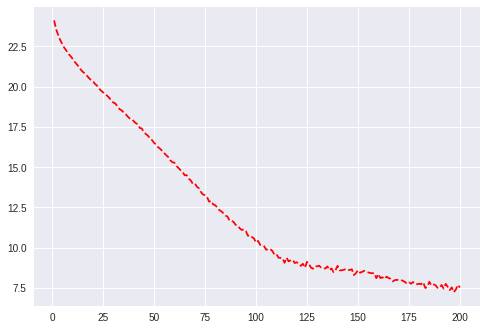

In [12]:
training_rmse = np.sqrt(fit.history['mean_squared_error'])
epoch_count = range(1, len(training_rmse) + 1)

plt.plot(epoch_count, training_rmse, 'r--')
plt.show();

In [13]:
# Run this same data through a linear regression model. Which achieves higher accuracy?
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'mean_squared_error: {mse}')
print(f'Root Mean Square Error from Linear Regression is {np.sqrt(mse)}')

mean_squared_error: 22.497612801529737
Root Mean Square Error from Linear Regression is 4.7431648507647015


**Without Feature Engineering:**

mean_squared_error: 23.195599256423

Root Mean Square Error from Linear Regression is 4.816180982523705

**With Feature Engineering:**

mean_squared_error: 22.497612801529737

Root Mean Square Error from Linear Regression is 4.7431648507647015


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####
# Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
import keras
import numpy as np
from keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [15]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [0]:
# Make sure to have your final layer have as many nodes as the number of classes
# that you want to predict.

# global hyperparameters
batch_size = 64
num_classes = 10
epochs = 20

In [17]:
# Flatten the images
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Make sure to one-hot encode your category labels
# This is needed to ensure it is multinomial classification
print(np.unique(y_train))
print(np.unique(y_test))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
60000 train samples
10000 test samples


In [18]:
# Try different hyperparameters. What is the highest accuracy that you 
# are able to achieve.
# activation function
# number of layers (depth)
# and number of neurons in each layer
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                12560     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [19]:
fit = model.fit(X_train, y_train, epochs=epochs, validation_split=.1)
scores = model.evaluate(X_test,y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 64us/step - loss: 0.8669 - acc: 0.6871 - val_loss: 0.5112 - val_acc: 0.8258
Epoch 2/20
54000/54000 [==============================] - 3s 55us/step - loss: 0.5930 - acc: 0.7871 - val_loss: 0.4600 - val_acc: 0.8367
Epoch 3/20
54000/54000 [==============================] - 3s 55us/step - loss: 0.5414 - acc: 0.8041 - val_loss: 0.4377 - val_acc: 0.8433
Epoch 4/20
54000/54000 [==============================] - 3s 55us/step - loss: 0.5190 - acc: 0.8149 - val_loss: 0.4398 - val_acc: 0.8418
Epoch 5/20
54000/54000 [==============================] - 3s 54us/step - loss: 0.5017 - acc: 0.8214 - val_loss: 0.4290 - val_acc: 0.8473
Epoch 6/20
54000/54000 [==============================] - 3s 55us/step - loss: 0.4879 - acc: 0.8250 - val_loss: 0.4186 - val_acc: 0.8518
Epoch 7/20
54000/54000 [==============================] - 3s 55us/step - loss: 0.4819 - acc: 0.8270 - val_loss: 0.4351 - val_acc:

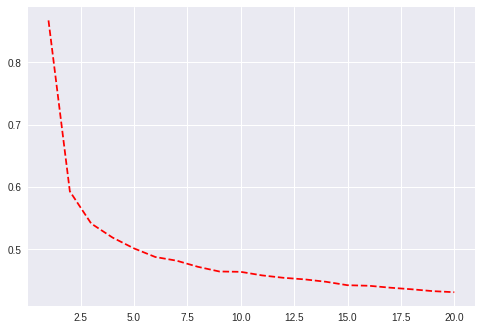

In [20]:
# Use the history object that is returned from model.fit to make graphs of 
# the model's loss or train/validation accuracies by epoch.
import matplotlib.pyplot as plt
training_loss = fit.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show();

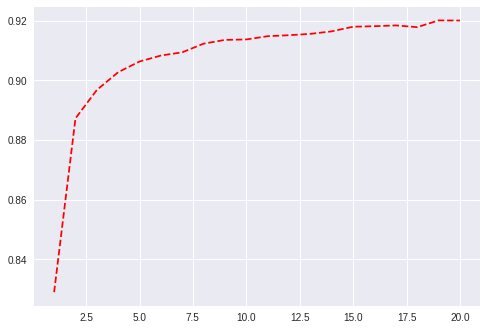

In [21]:
training_acc = np.sqrt(fit.history['acc'])
epoch_count = range(1, len(training_acc) + 1)

plt.plot(epoch_count, training_acc, 'r--')
plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.